# Telecom Customer Churn Prediction

In [68]:
#importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
#importing dataset
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
#printing first five rows of dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
#Printing shape of dataset
df.shape

(7043, 21)

In [71]:
#plotting info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [72]:
#plotting describation of dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [73]:
#Understanding the value counts of all the variables
for col in df.columns:
    print(df[[col]].value_counts())

customerID
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Length: 7043, dtype: int64
gender
Male      3555
Female    3488
dtype: int64
SeniorCitizen
0                5901
1                1142
dtype: int64
Partner
No         3641
Yes        3402
dtype: int64
Dependents
No            4933
Yes           2110
dtype: int64
tenure
1         613
72        362
2         238
3         200
4         176
         ... 
28         57
39         56
44         51
36         50
0          11
Length: 73, dtype: int64
PhoneService
Yes             6361
No               682
dtype: int64
MultipleLines   
No                  3390
Yes                 2971
No phone service     682
dtype: int64
InternetService
Fiber optic        3096
DSL                2421
No                 1526
dtype: int64
OnlineSecurity     
No                     3498
Yes                    2019
No internet se

In [74]:
#plotting unique values of every columns
for col in df.columns:
    print(f'{col}:{df[col].unique()}')

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [75]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [76]:
df.drop('customerID',axis=1,inplace=True)

In [77]:
#printing first five rows of dataset
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [78]:
#plotting unique values of TotalCharges columns
print(list(df["TotalCharges"].unique()))

['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95', '587.45', '326.8', '5681.1', '5036.3', '2686.05', '7895.15', '1022.95', '7382.25', '528.35', '1862.9', '39.65', '202.25', '20.15', '3505.1', '2970.3', '1530.6', '4749.15', '30.2', '6369.45', '1093.1', '6766.95', '181.65', '1874.45', '20.2', '45.25', '7251.7', '316.9', '3548.3', '3549.25', '1105.4', '475.7', '4872.35', '418.25', '4861.45', '981.45', '3906.7', '97', '144.15', '4217.8', '4254.1', '3838.75', '1426.4', '1752.65', '633.3', '4456.35', '1752.55', '6311.2', '7076.35', '894.3', '7853.7', '4707.1', '5450.7', '2962', '957.1', '857.25', '244.1', '3650.35', '2497.2', '930.9', '887.35', '49.05', '1090.65', '7099', '1424.6', '177.4', '6139.5', '2688.85', '482.25', '2111.3', '1216.6', '79.35', '565.35', '496.9', '4327.5', '973.35', '918.75', '2215.45', '1057', '927.1', '1009.25', '2570.2', '74.7', '5714.25', '7107', '7459.05', '927.35', '4748.7', '113.85', '1107.2', '2514.5', '19.45', '

In [79]:
#Printing rows of dataset with TotalCharges ==" "(empty)
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [80]:
#Printing rows of dataset without TotalCharges ==" "(empty)
df=df[df["TotalCharges"]!=" "]
#Cheacking shape of data
df.shape

(7032, 20)

In [81]:
#replacing all the values with No internet service to No
col_list=["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
for col in col_list:
    df[col].replace('No internet service','No',inplace=True)

In [82]:
#plotting unique values of columns
for col in col_list:
    print(f'{col}:{df[col].unique()}')

OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']


In [83]:
#replacing all the values with No phone service to No
df.replace('No phone service','No',inplace=True)

In [84]:
# Converting object data type of TotalCharges column to float64
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


<AxesSubplot:ylabel='Churn'>

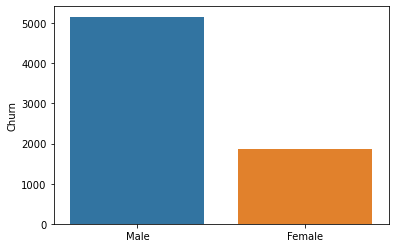

In [86]:
#importing required librarires
import seaborn as sns
#creating gender_count and Churn_count two variables for plotting bar graph
gender_count=df["gender"].value_counts().index
Churn_count=df["Churn"].value_counts()
#BAR plot for understanding churn rate with respect to gender
sns.barplot(x=gender_count,y=Churn_count)

<AxesSubplot:>

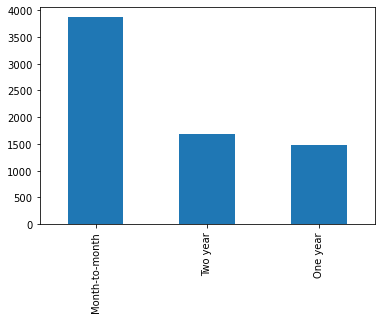

In [105]:
#Plotting contract type with respect number of customers 
df["Contract"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='Dependents'>

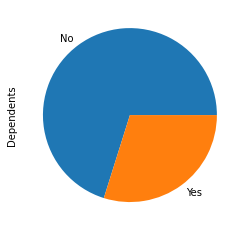

In [107]:
#Pie chart to understand dependents variable distribustion 
df["Dependents"].value_counts().plot(kind="pie")

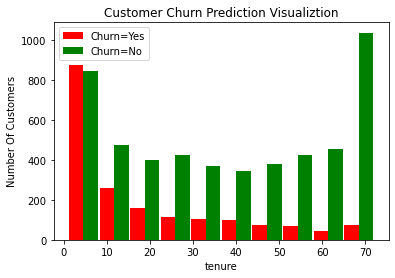

In [99]:
#creating tenure_churn_no and tenure_churn_yes two variables for plotting histogram
tenure_churn_no = df[df.Churn=='No'].tenure
tenure_churn_yes = df[df.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
#Histogram for understanding tenure for number of customers
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

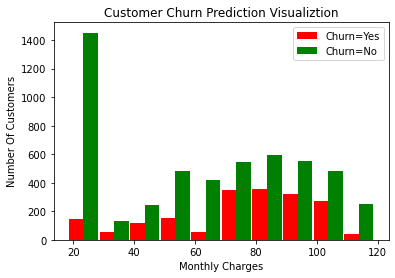

In [102]:
#creating mc_churn_no and mc_churn_yes two variables for plotting histogram
mc_churn_no = df[df.Churn=='No'].MonthlyCharges      
mc_churn_yes = df[df.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
#Histogram for understanding monthly charges for number of customers
plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [16]:
#printing first five rows of dataset
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
#Replacing all the Yes values with 1 and No values with 0
df.replace({"Yes":1,"No":0},inplace=True)
#Replacing all the Male values with 1 and Female values with 0
df.replace({"Male":1,"Female":0},inplace=True)
#printing first five rows of data
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
#plotting unique values of columns
for col in df.columns:
    print(f'{col}:{df[col].unique()}')

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [19]:
#Creating dummie varible of following columns
cols_to_OHE=["Contract","PaymentMethod","InternetService"]
df=pd.get_dummies(data=df,columns=cols_to_OHE)
#printing first five rows of dataset
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,0,1,0
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [20]:
#scalling down following variables
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
# importing required libraries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [21]:
#plotting unique values of every columns
for col in df.columns:
    print(f'{col}:{df[col].unique()}')

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [22]:
#printing columns names
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic'],
      dtype='object')

In [23]:
#assighning X and y
X=df.drop("Churn",axis=1)
y=df["Churn"]

In [24]:
#Splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [25]:
X_train.shape

(5625, 26)

In [26]:
X_test.shape

(1407, 26)

In [27]:
y_train.shape

(5625,)

In [28]:
y_test.shape

(1407,)

In [32]:
# importing required libraries
import tensorflow as tf
from tensorflow import keras

#assigning layers to our network
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
#trainning our model with x_train and y_train
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.7614
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8000
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8052
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8075
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8084
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8084
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8091
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8107
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4027 - accuracy: 0.8139
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4038 - accura

176/176 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8340
Epoch 82/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3509 - accuracy: 0.8327
Epoch 83/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.8332
Epoch 84/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3489 - accuracy: 0.8336
Epoch 85/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8359
Epoch 86/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3502 - accuracy: 0.8322
Epoch 87/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8320
Epoch 88/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8322
Epoch 89/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 0.8316
Epoch 90/100
176/176 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 

In [33]:
y_preds=model.predict(X_test)
y_preds[:5]

array([[0.2620679 ],
       [0.5014467 ],
       [0.01044622],
       [0.9207699 ],
       [0.26069117]], dtype=float32)

In [34]:
y_pred = []
for element in y_preds:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [35]:
Actual_churn=y_test[:10]
Actual_churn

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [36]:
Predicted_churn=y_pred[:10]
Predicted_churn

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [37]:
#creating new table for camprison of new and old values
camparison_table=[]
camparison_table=pd.DataFrame(camparison_table)
camparison_table["Actual_churn"]=Actual_churn
camparison_table["Predicted_churn"]=Predicted_churn
#printing first ten rows of dataset
camparison_table.head(10)

,Actual_churn,Predicted_churn
2660,0,0
744,0,1
5579,1,0
64,1,1
3287,1,0
816,1,1
2670,0,0
5920,0,1
1023,0,0
6087,0,0


In [38]:
# importing required libraries
from sklearn.metrics import confusion_matrix , classification_report
#classification_report fro understanding precision recall and f1 score 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       999
           1       0.63      0.57      0.60       408

    accuracy                           0.78      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.77      0.78      0.78      1407



Text(69.0, 0.5, 'Truth')

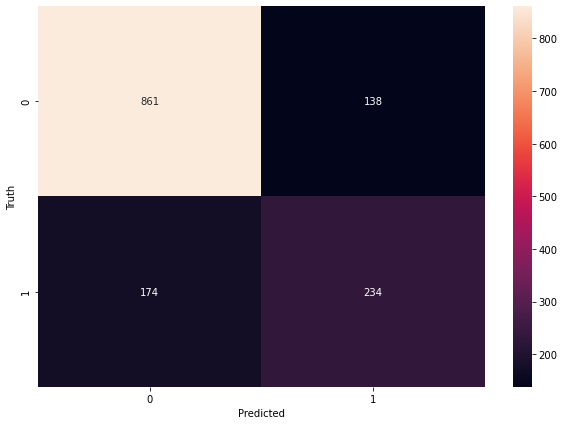

In [41]:
# importing required libraries
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
#plotting heat map to understand confussion matrix
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')